### 10 Academy 
### Week-6 Challenge  
##### Credit Scoring BNPL, Modelling 
##### Bati Bank 

Ethel.C

In [1]:
import sys

# Add the scripts and src directories to the Python path
scripts_dir = r'E:\DS+ML\AIM3\Practice\Week-6\scripts' #r'E:\DS+ML\AIM3\Week6\scripts'
src_dir = r'E:\DS+ML\AIM3\Practice\Week-6\src'#r'E:\DS+ML\AIM3\Week6\src'
# Update the file paths
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)
if src_dir not in sys.path:
    sys.path.append(src_dir)


In [2]:
# Importing functions from the modelling.py script
from src.Modelling import (load_data, split_data, train_logreg, train_rf, tune_random_forest, plot_hyperparameter_results, 
                            evaluate_model, plot_feature_importance, radar_chart, save_model)


#### Step 1: Load and Clean Data

In [3]:
data = load_data("E:/DS+ML/AIM3/Week6/data/rfm_with_woe.csv")
data.head()

Data Loaded: 3742 rows, 12 columns


,CustomerId,Recency,Frequency,Monetary,Stability,RFMS_Score,Default,bins,Recency_WoE,Frequency_WoE,Monetary_WoE,Stability_WoE
0,CustomerId_1,0.749772,0.000000,0.692845,0.000000,0.432785,0,"(-0.001, 0.419]",20.373358,0.431720,-1.009381,-0.179783
1,CustomerId_10,0.749772,0.000000,0.692845,0.000000,0.432785,0,"(-0.001, 0.419]",20.373358,0.431720,-1.009381,-0.179783
2,CustomerId_1001,0.305697,0.000978,0.692671,0.632456,0.426197,0,"(0.574, 0.678]",0.209824,0.653942,0.779447,-0.175862
3,CustomerId_1002,0.000000,0.002445,0.688945,0.421712,0.291515,1,"(0.419, 0.574]",-1.158206,-0.267768,0.200402,-0.004279
4,CustomerId_1003,1.000000,0.001222,0.692792,0.521248,0.612332,0,"(0.419, 0.574]",19.738158,0.429349,0.779447,-0.004279


In [4]:
data.shape

(3742, 12)

#### Step 2: Split Data into Features and Target

In [5]:
target = "Default"
features = ['Recency_WoE', 'Frequency_WoE', 'Monetary_WoE', 'Stability_WoE']
X_train, X_test, y_train, y_test = split_data(data, target, features)

Data Split: 2619 training samples, 1123 test samples


#### Step 3: Train Models

In [6]:
logreg_model = train_logreg(X_train, y_train)
rf_model = train_rf(X_train, y_train)

#### Step 4: Evaluate Models

In [7]:
print("Evaluating Logistic Regression:")
lr_metrics = evaluate_model(X_test, y_test, logreg_model)

print("\nEvaluating Random Forest:")
rf_metrics = evaluate_model(X_test, y_test, rf_model)

Evaluating Logistic Regression:
Accuracy: 0.817
Precision: 0.779
Recall: 0.882
F1-Score: 0.827
AUC: 0.894

Evaluating Random Forest:
Accuracy: 0.852
Precision: 0.820
Recall: 0.902
F1-Score: 0.859
AUC: 0.947


#### Model Comparison Visualization  

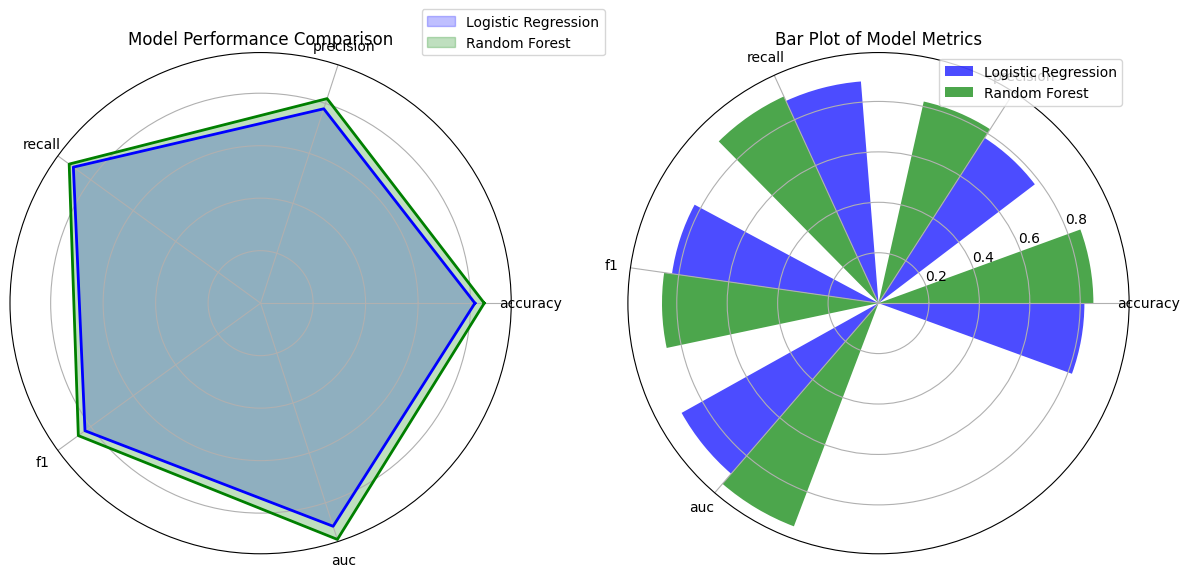

In [8]:

radar_chart(lr_metrics, rf_metrics)

#### Step 5: Hyperparameter Tuning

In [9]:
rf_search = tune_random_forest(X_train, y_train)


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': None}
Best ROC-AUC: 0.949


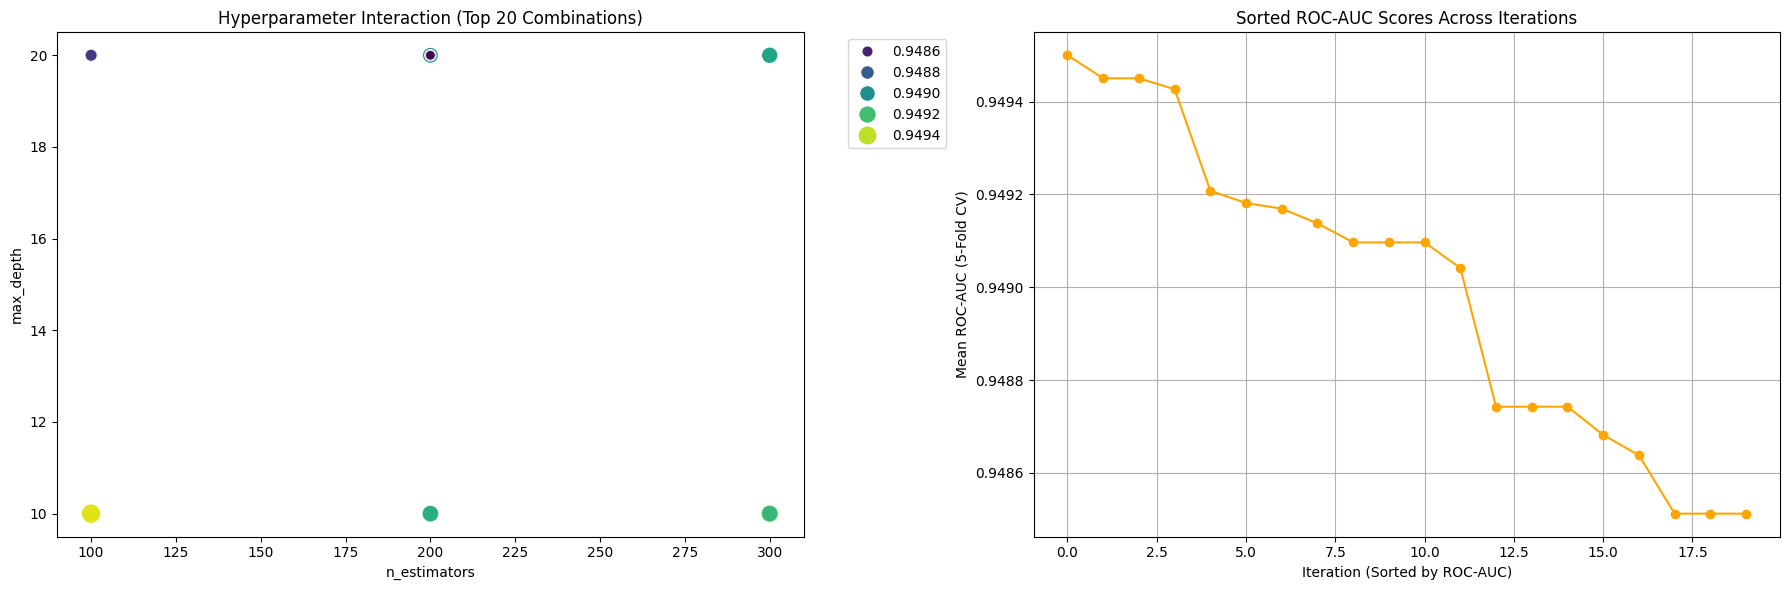

In [10]:
plot_hyperparameter_results(rf_search)


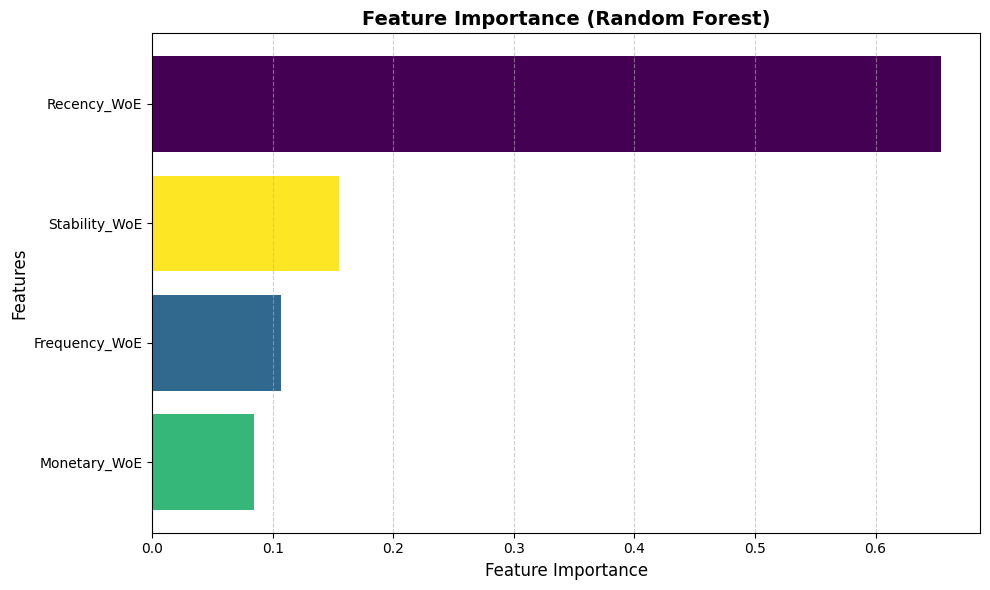

In [11]:
plot_feature_importance(rf_model, X_train)


### Save models


In [12]:
save_model(logreg_model, 'logreg_model.joblib')
save_model(rf_model, 'rf_model.joblib')

Model saved as logreg_model.joblib
Model saved as rf_model.joblib
